In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("superstore.csv")
df.head()

,Order ID,Ship Mode,Segment,Region,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Second Class,Consumer,South,FUR-BO-10001798,261.9600,2,0%,41.9136
1,CA-2016-152156,Second Class,Consumer,South,FUR-CH-10000454,731.9400,3,0%,219.5820
2,CA-2016-138688,Second Class,Corporate,West,OFF-LA-10000240,14.6200,2,0%,6.8714
3,US-2015-108966,Standard Class,Consumer,South,FUR-TA-10000577,957.5775,5,0.45%,-383.0310
4,US-2015-108966,Standard Class,Consumer,South,OFF-ST-10000760,22.3680,2,0.20%,2.5164


### Creating pie chart

In [6]:
ship_mode = df["Ship Mode"]

mode_count = {}
for mode in ship_mode:
    if mode in mode_count:
        mode_count[mode]+=1
    else:
        mode_count[mode]=1

mode_count

{'Second Class': 1945,
 'Standard Class': 5968,
 'First Class': 1538,
 'Same Day': 543}

In [8]:
data = list(mode_count.values())
labels = list(mode_count.keys())
data, labels

([1945, 5968, 1538, 543],
 ['Second Class', 'Standard Class', 'First Class', 'Same Day'])

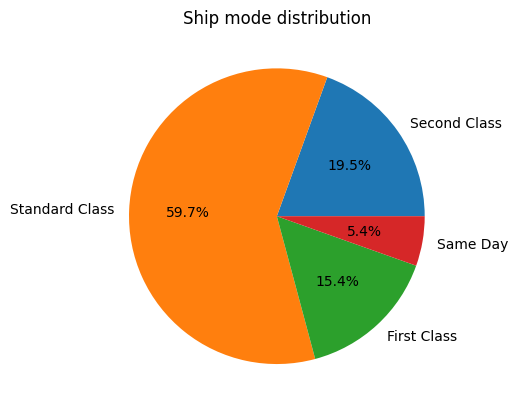

In [9]:
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title("Ship mode distribution")
plt.show()

### <b>Conclusion:</b>
From the pie chart above it is clear that majority of the orders are placed through the standard class shipping mode.

## Bar Chart  
  
  Q5) Plot a bar chart comparing the average `Discount` across all the `Regions` and report back the `Region` getting the highest average discount
  Note- You need to clean the `Discount` column first
      a)Central
      b)South
      c)West
      d)East


In [10]:
df.head()

,Order ID,Ship Mode,Segment,Region,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Second Class,Consumer,South,FUR-BO-10001798,261.9600,2,0%,41.9136
1,CA-2016-152156,Second Class,Consumer,South,FUR-CH-10000454,731.9400,3,0%,219.5820
2,CA-2016-138688,Second Class,Corporate,West,OFF-LA-10000240,14.6200,2,0%,6.8714
3,US-2015-108966,Standard Class,Consumer,South,FUR-TA-10000577,957.5775,5,0.45%,-383.0310
4,US-2015-108966,Standard Class,Consumer,South,OFF-ST-10000760,22.3680,2,0.20%,2.5164


In [28]:
regions = df["Region"]
discounts = df["Discount"].str.strip("%").astype(float)

region_count = {}
for region in regions:
    if region in region_count:
        region_count[region] +=1
    else:
        region_count[region] = 1

regional_discounts = {}
for i in range(len(regions)):
    if regions[i] in regional_discounts:
        regional_discounts[regions[i]] += discounts[i]
    else:
        regional_discounts[regions[i]] = discounts[i]



({'South': 1620, 'West': 3203, 'Central': 2323, 'East': 2848},
 {'South': 238.54999999999688,
  'West': 350.19999999999055,
  'Central': 558.3400000000001,
  'East': 413.99999999999267})

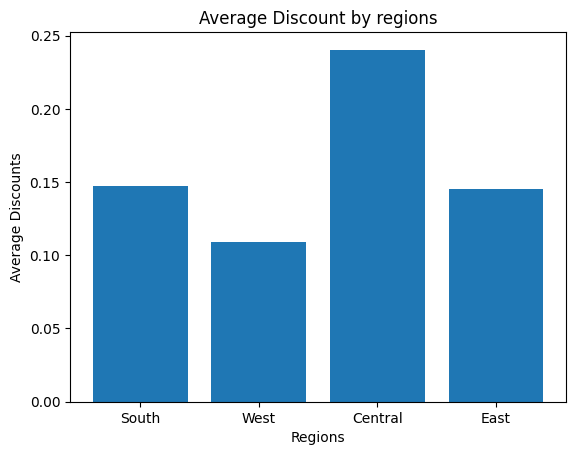

In [33]:
total_regions = list(regional_discounts.keys())
total_discounts = list(regional_discounts.values())
reg_count = list(region_count.values())
avg_discounts = [total_discounts[i] / reg_count[i] for i in range(len(total_regions))]


fig, ax = plt.subplots()
ax.bar(total_regions, avg_discounts)
ax.set_ylabel('Average Discounts')
ax.set_xlabel('Regions')
ax.set_title('Average Discount by regions')
plt.show()



### <b>Conclusion:</b>

From this bar chart we can conclude that Central Region gives maximum discounts to the customers whereas West Region gives minimum discount.


In [34]:
df.head()

,Order ID,Ship Mode,Segment,Region,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Second Class,Consumer,South,FUR-BO-10001798,261.9600,2,0%,41.9136
1,CA-2016-152156,Second Class,Consumer,South,FUR-CH-10000454,731.9400,3,0%,219.5820
2,CA-2016-138688,Second Class,Corporate,West,OFF-LA-10000240,14.6200,2,0%,6.8714
3,US-2015-108966,Standard Class,Consumer,South,FUR-TA-10000577,957.5775,5,0.45%,-383.0310
4,US-2015-108966,Standard Class,Consumer,South,OFF-ST-10000760,22.3680,2,0.20%,2.5164


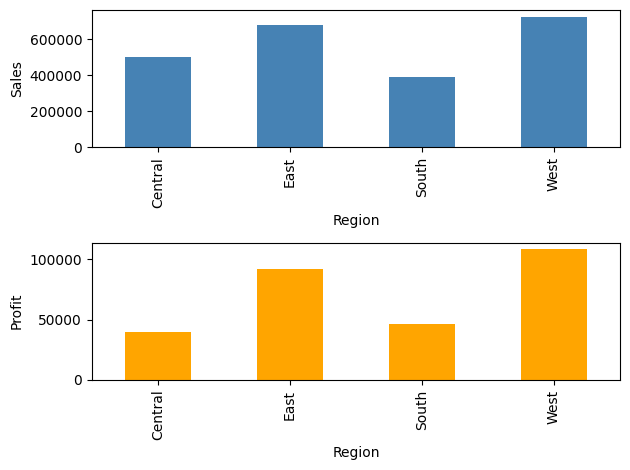

In [36]:
# Total sales and profit by region
region_sales = df.groupby("Region")["Sales"].sum()
region_profit = df.groupby("Region")["Profit"].sum()

# Visualize sales and profit by region
fig, ax = plt.subplots(2, 1)
region_sales.plot.bar(ax=ax[0], color="steelblue")
ax[0].set_ylabel("Sales")
region_profit.plot.bar(ax=ax[1], color="orange")
ax[1].set_ylabel("Profit")
plt.tight_layout()
plt.show()


Remark: We can observe hete that the sales and profit is higher in the west region where the average discount is also high. So in order to increase sales and profits in other regions we can give more discount to customers.

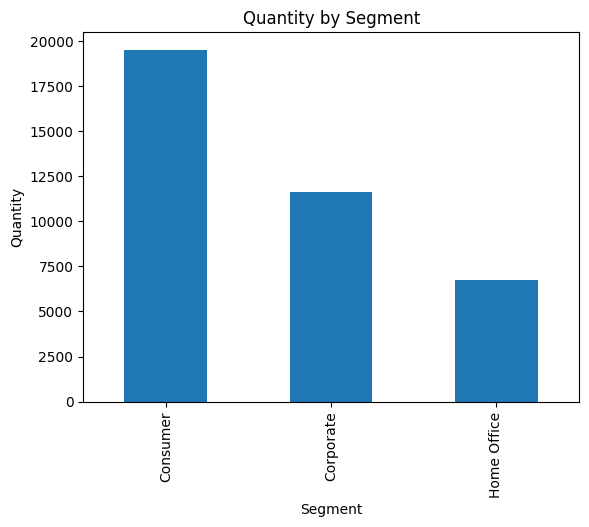

In [41]:
quantity_by_segment = df.groupby('Segment')['Quantity'].sum()

quantity_by_segment.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Quantity')
plt.title('Quantity by Segment')
plt.show()


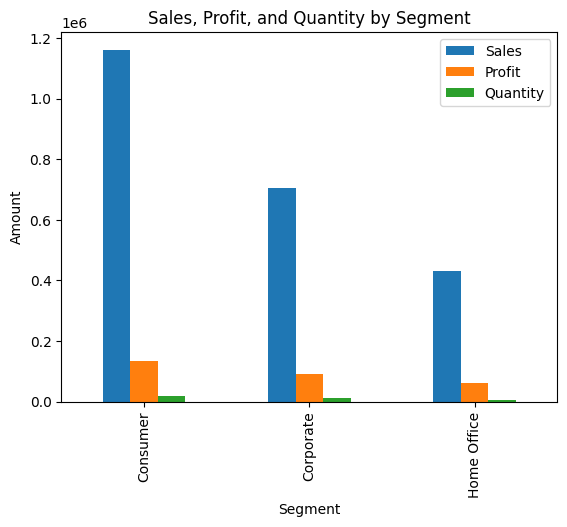

In [44]:

grouped_data = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'})


grouped_data.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Sales, Profit, and Quantity by Segment')
plt.legend(['Sales', 'Profit', 'Quantity'])
plt.show()


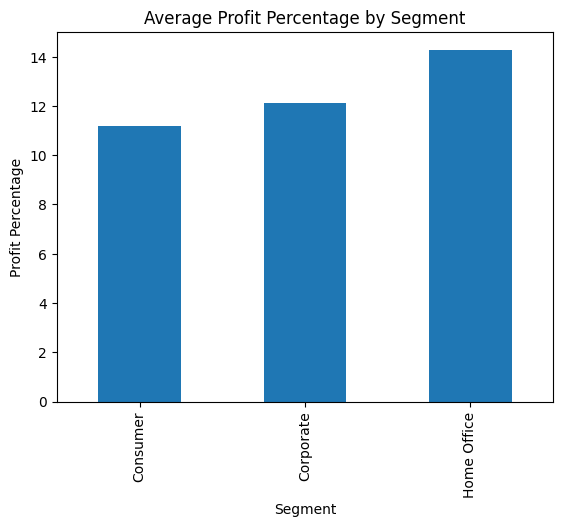

In [45]:

df['Profit_Percentage'] = (df['Profit'] / df['Sales']) * 100

grouped_data = df.groupby('Segment')['Profit_Percentage'].mean()

grouped_data.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Profit Percentage')
plt.title('Average Profit Percentage by Segment')
plt.show()


from the above charts It can be concluded that even the sales and quantity of the home office segment is less as compared to other segments but its average profit is higher than the the others. 
so on the basis of this analysis the company can target home office more to increase their sales and the profit will simultaneously increase as compared to other segments.